In [1]:
import os

from sklearn.ensemble import RandomForestClassifier

import pandas as pd

import numpy as np

import re

from sklearn.base import TransformerMixin


In [2]:
if __name__ == '__main__':

    train = pd.read_csv(os.path.join(os.path.dirname('/home/nharpale/PA2ML/'), 'myenv2', 'train.csv'), header=0, sep=',')


In [3]:
train.shape

(1460, 81)

In [4]:
col = train.columns.values
print(col)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [5]:
#1
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):
        X_nan = X.columns[X.isna().any()].tolist()
        print("Columns with NaN's ------- \n ",X_nan)
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else int(X[c].mean()) for c in X_nan],
            index=X_nan)
        print("Values filled for NaN's ------- \n",self.fill)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [6]:
trainfill = DataFrameImputer().fit_transform(train)

Columns with NaN's ------- 
  ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Values filled for NaN's ------- 
 LotFrontage         70
Alley             Grvl
MasVnrType        None
MasVnrArea         103
BsmtQual            TA
BsmtCond            TA
BsmtExposure        No
BsmtFinType1       Unf
BsmtFinType2       Unf
Electrical       SBrkr
FireplaceQu         Gd
GarageType      Attchd
GarageYrBlt       1978
GarageFinish       Unf
GarageQual          TA
GarageCond          TA
PoolQC              Gd
Fence            MnPrv
MiscFeature       Shed
dtype: object


In [7]:
train.shape

(1460, 81)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1545f83a20>,
      dtype=object)

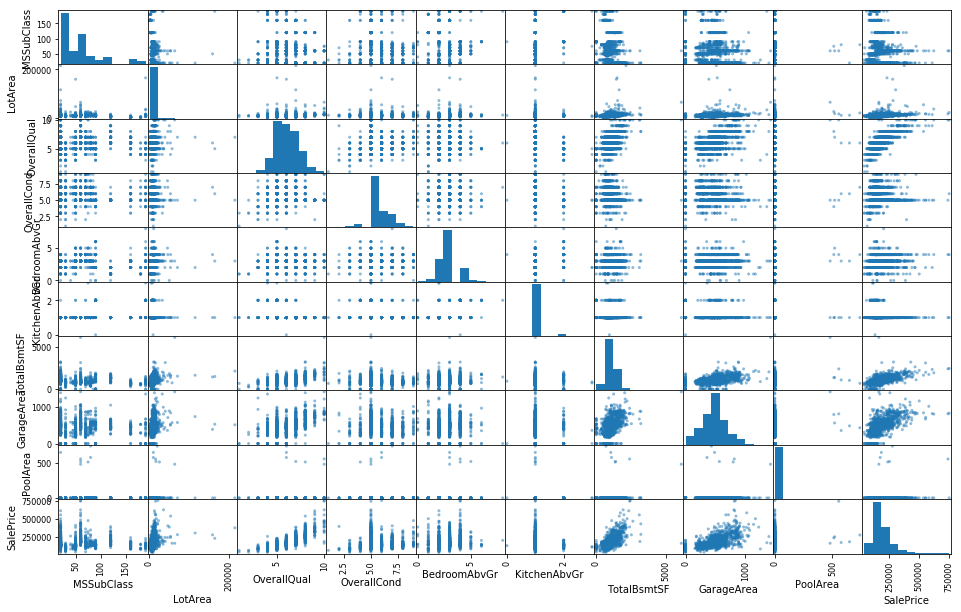

In [28]:
#2
from pandas.plotting import scatter_matrix

attributes = ["MSSubClass" ,  "LotArea" ,"OverallQual" ,"OverallCond", "BedroomAbvGr",
              "KitchenAbvGr" , "TotalBsmtSF" , "GarageArea", "PoolArea" , "SalePrice" ]
scatter_matrix(trainfill[attributes], figsize=(16, 10))

#Asnwer: I think GarageArea , TotalBsmtSF and LotArea have strong correlation with SalePrice because if you see 
#the last row of scatter matrix all 3 features has somewhere around same spread as SalePrice.

In [9]:
#3
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X = np.array(trainfill["GarageArea"]).reshape(-1,1) 
y = np.array(trainfill["SalePrice"])
lin_reg.fit(X,y)
y_predict = lin_reg.predict(X)
import math
y = [math.log(i) for i in y]
y_predict = [math.log(i if i>0 else 1) for i in y_predict]

from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_predict, y)))

##Answer: The RMSE of model is 31 percent and I used the feature "GarageArea".

Root Mean Squared Error: 0.31593571189759184


In [10]:
#4 a
from sklearn.linear_model import LinearRegression
lin_reg1 = LinearRegression()
X4 = np.array(trainfill[["GarageArea","TotalBsmtSF"]]) #"MSSubClass" ,  "LotArea" ,"OverallQual" ,"OverallCond", "BedroomAbvGr",
              #"KitchenAbvGr" , "TotalBsmtSF" , "GarageArea", "PoolArea"
y4 = np.array(trainfill["SalePrice"])
lin_reg1.fit(X4,y4)
y_predict4 = lin_reg1.predict(X4)
import math
y4 = [math.log(i) for i in y4]
y_predict4 = [math.log(i if i>0 else 1) for i in y_predict4]

from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_predict4, y4)))


Root Mean Squared Error: 0.2802410516108577


In [11]:
#4b
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X = np.array(trainfill[["GarageArea", "KitchenAbvGr"]])
y = np.array(trainfill["SalePrice"])
lin_reg.fit(X,y)
y_predict = lin_reg.predict(X)
import math
y = [math.log(i) for i in y]
y_predict = [math.log(i if i>0 else 1) for i in y_predict]

from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_predict, y)))

Root Mean Squared Error: 0.3350448458262456


In [12]:
#4c
##Answer : The 4a model performed better than the model in question 3. I suppose this model performed better 
## because both the features were closely correleated to one another plus were in correlation with SalePrice. Also the 
## more the varaince the feature explains the more good the model perfroms. And also now we are using 2 features 
## instead of 1 in question 3. The 4b model performed little bit worse than model in question 3 because although we 
## used 2 features the 2 features themselves were not well correlated and I think tht "KitchenAbvGr" might not explain a 
## good amount of varaince in the dataset. 

In [13]:
#5alinearRegression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X = np.array(trainfill[["GarageArea", "LotArea", "TotalBsmtSF", "BedroomAbvGr"]])
y = np.array(trainfill["SalePrice"])
lin_reg.fit(X,y)
y_predict = lin_reg.predict(X)
import math
y = [math.log(i) for i in y]
y_predict = [math.log(i if i>0 else 1) for i in y_predict]

from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_predict, y)))

Root Mean Squared Error: 0.2727423085267651


In [14]:
#5bSGD
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, penalty=None, eta0=0.1, warm_start=True, learning_rate="constant",
                       random_state=42 )
X = np.array(trainfill[["GarageArea", "LotArea", "TotalBsmtSF", "BedroomAbvGr"]])
y = np.array(trainfill["SalePrice"])
sgd_reg.fit(X, y)
y_predict = sgd_reg.predict(X)
import math
y = [math.log(i) for i in y]
y_predict = [math.log(i if i>0 else 1) for i in y_predict]

from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_predict, y)))

Root Mean Squared Error: 12.03067963909878


In [15]:
#5c
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_jobs = -1)
X = np.array(trainfill[["GarageArea", "LotArea", "TotalBsmtSF", "BedroomAbvGr"]])
y = np.array(trainfill["SalePrice"])
rf_reg.fit(X, y)
y_predict = rf_reg.predict(X)
import math
y = [math.log(i) for i in y]
y_predict = [math.log(i if i>0 else 1) for i in y_predict]

from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_predict, y)))


/home/nharpale/PA2ML/myenv2/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Root Mean Squared Error: 0.10424903460250735


In [16]:
##Answer : I think RandomForestRegressor performed well because as we know its an ensemble of many decision trees and it 
## gives final output based on voting where as other two models are just linear models. Both RandomforestRegressor 
## and linear regression models performed best as compared to models in question 3 and 4 because now we are using more 
## features and I think all the features are well correlated and explain more variance in dataset. Stochastic Gradient Decsent
## performed worst because I think it got lost, stuck in local minima and never reached the local minima. Also I played 
## around alot with the parameters but its very crucial to set correct parameters.

In [17]:
#6
test = pd.read_csv(os.path.join(os.path.dirname('/home/nharpale/PA2ML/'), 'myenv2', 'test.csv'), header=0, sep=',')
test.shape
test.columns.values
testfill = DataFrameImputer().fit_transform(test)

Columns with NaN's ------- 
  ['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']
Values filled for NaN's ------- 
 MSZoning             RL
LotFrontage          68
Alley              Grvl
Utilities        AllPub
Exterior1st     VinylSd
Exterior2nd     VinylSd
MasVnrType         None
MasVnrArea          100
BsmtQual             TA
BsmtCond             TA
BsmtExposure         No
BsmtFinType1        GLQ
BsmtFinSF1          439
BsmtFinType2        Unf
BsmtFinSF2           52
BsmtUnfSF           554
TotalBsmtSF        1046
BsmtFullBath          0
BsmtHalfBath          0
KitchenQual          

In [18]:
newt = trainfill.select_dtypes(exclude=['object'])
newt.drop(newt.columns[[0 , 37]], axis=1, inplace=True)
print(newt.columns)
newt.shape

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


/home/nharpale/PA2ML/myenv2/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(1460, 36)

In [19]:
newtest = testfill.select_dtypes(exclude=['object'])
newtest.drop(newtest.columns[0], axis=1, inplace=True)
print(newtest.columns, newtest.shape)
newtest.shape

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object') (1459, 36)


(1459, 36)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components = .95)
pca.fit(newt)
X2D = pca.transform(newt)
pca.explained_variance_ratio_.cumsum()


X22D = pca.transform(newtest)
pca.explained_variance_ratio_.cumsum()



array([0.98479312])

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
y = np.array(trainfill["SalePrice"])
lin_reg.fit(X2D,y)
y_predict = lin_reg.predict(X2D)
import math
y = [math.log(i) for i in y]
y_predict = [math.log(i if i>0 else 1) for i in y_predict]

from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_predict, y)))


Root Mean Squared Error: 0.3886397420301417


In [22]:
result = lin_reg.predict(X22D.reshape(-1,1))
print(result.shape)

# Write the test results 
output = pd.DataFrame( data={"id":testfill["Id"],"SalePrice":result} )
output.to_csv( "linear.csv", index=False, quoting=3 )

(1459,)


In [23]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=30, tol=-np.infty, penalty=None, eta0=0.1, warm_start=True, learning_rate="constant",
                       random_state=42 )
#X = np.array(trainfill[["GarageArea", "LotArea", "TotalBsmtSF", "BedroomAbvGr"]])
y = np.array(trainfill["SalePrice"])
sgd_reg.fit(X2D, y)
y_predict = sgd_reg.predict(X2D)
import math
y = [math.log(i) for i in y]
y_predict = [math.log(i if i>0 else 1) for i in y_predict]

from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_predict, y)))

Root Mean Squared Error: 19.660095481272325


In [24]:
result = sgd_reg.predict(X22D.reshape(-1,1))
print(result.shape)

# Write the test results 
output = pd.DataFrame( data={"id":testfill["Id"],"SalePrice":result} )
output.to_csv( "SGD1.csv", index=False, quoting=3 )

(1459,)


In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_jobs = -1)
#X = np.array(trainfill[["GarageArea", "LotArea", "TotalBsmtSF", "BedroomAbvGr"]])
y = np.array(trainfill["SalePrice"])
rf_reg.fit(X2D, y)
y_predict = rf_reg.predict(X2D)

import math
y = [math.log(i) for i in y]
y_predict = [math.log(i if i>0 else 1) for i in y_predict]

from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_predict, y)))


/home/nharpale/PA2ML/myenv2/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Root Mean Squared Error: 0.1735324305193893


In [26]:
result = rf_reg.predict(X22D)
print(result.shape)
# Write the test results 
output = pd.DataFrame( data={"id":testfill["Id"], "SalePrice":result} )
output.to_csv( "RFDtrain.csv", index=False, quoting=3) 

(1459,)


In [27]:
##Answer:  All the models in question 6 performed bad than models in question 5 because as we were using more than 4 features 
## and had a good variance but not all of them were nicely correlated with themselves and sales price. Also I think there were 
## many irrelevant features like year remodeled because many of the values had same year when the house was built. 